In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ignore all warnings
warnings.filterwarnings('ignore')

C:\Users\WenJIE\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\WenJIE\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_pjy=pd.read_csv("comprehensive_income_2023_pjy.csv")
data_pjy

,MONTH,SALES,STOCKS_AT_THE_BEGINNING_OF_YEAR,PURCHASE,PURCHASE_PACKAGING,PURCHASE_RETURNED,STOCKS_AT_THE_END_OF_THE_YEAR,OI_INTEREST_RECEIVED,OI_CASH_REWARD,ADVERTISEMENT,...,STAFF_TRAINING,STAFF_UNIFORM,SECRETARY_FEES,AUDIT_FEES,TAX_FEES,DIRECTOR_FEES,UPKEEP_OF_COMPUTER_SOFTWARE,UPKEEP_OF_HOSTEL,PROCESSING_FEES,NET_PROFIT
0,31/01/2023,199521.18,19223.35,85336.25,1513.15,-240,-17360.24,52.72,0.0,2116.81,...,0.00,0.00,70,0,0,7500,0.00,0,0,1232.67
1,28/02/2023,150794.91,17360.24,66697.33,672.15,0,-14434.32,77.31,0.0,144.11,...,0.00,0.00,70,0,0,7500,0.00,0,0,-22184.43
2,31/03/2023,154583.49,14434.32,74023.96,603.30,-345,-17860.00,37.59,0.0,2331.66,...,150.00,50.00,120,0,0,7500,667.76,0,0,-15132.19
3,30/04/2023,107568.07,17860.00,44973.04,848.90,0,-13089.66,33.01,117.5,2446.05,...,0.00,0.00,70,3000,1400,7500,0.00,0,0,-37456.13
4,31/05/2023,177904.95,13089.66,84489.53,615.15,-280,-15334.73,22.03,0.0,286.84,...,250.00,0.00,70,0,0,7500,0.00,0,0,621.91
5,30/06/2023,188581.32,15334.73,84043.53,850.35,-105,-18469.95,24.15,0.0,69.51,...,58.00,451.00,70,0,0,7500,0.00,0,0,3712.91
6,31/07/2023,198968.82,18469.95,80324.38,568.55,-595,-15543.40,36.22,0.0,3887.47,...,58.00,40.50,70,0,0,7500,0.00,0,0,1432.76
7,31/08/2023,202740.99,15543.40,82055.56,846.35,-280,-11797.11,26.76,0.0,1197.42,...,0.00,426.80,70,0,0,7500,0.00,520,0,6756.57
8,30/09/2023,184525.52,11797.11,77723.97,1049.55,-245,-12729.81,33.19,0.0,1545.30,...,430.45,108.30,70,180,0,7500,0.00,-520,250,374.05
9,31/10/2023,183762.78,12729.81,76464.15,704.20,-175,-11437.22,12.99,0.0,780.87,...,0.00,185.50,70,0,84,7500,0.00,0,0,7289.35


In [3]:
# Group the columns
data_pjy['COST_OF_GOODS'] = (
    data_pjy['STOCKS_AT_THE_BEGINNING_OF_YEAR'] + data_pjy['PURCHASE'] + 
    data_pjy['PURCHASE_PACKAGING'] + data_pjy['PURCHASE_RETURNED'] + data_pjy['STOCKS_AT_THE_END_OF_THE_YEAR']
)

data_pjy['CO_SEC_FEE'] = (
    data_pjy['HANDLING_CHARGES'] + data_pjy['CONSULTANCY_PROFESSIONAL_FEES'] + data_pjy['FILING_FEES'] +
    data_pjy['SUBSCRIPTION_FEES'] + data_pjy['BRANDING_FEES'] + 
    data_pjy['LICENSE_FEES'] + data_pjy['SECRETARY_FEES'] + data_pjy['AUDIT_FEES'] +
    data_pjy['TAX_FEES'] + data_pjy['PROCESSING_FEES']
)

data_pjy['SOCIAL_SECURITY_FEE'] = (
    data_pjy['EIS_EMPLOYER'] + data_pjy['SOCSO_EMPLOYER'] + data_pjy['EPF_EMPLOYER']
)

data_pjy['FIX_FEE'] = (
    data_pjy['INTERNET_EXPENSES'] + data_pjy['TELEPHONE_AND_FAX_CHARGES'] +
    data_pjy['RENTAL_SHOP'] + data_pjy['INSURANCE'] +
    data_pjy['RENTAL_HOSTEL_B121'] + data_pjy['RENTAL_HOSTEL_FADZILLAH'] +
    data_pjy['PEST_CONTROL'] + data_pjy['DEPRECIATION_OF_FIXED_ASSETS'] + data_pjy['CREDIT_CARD_CHARGES'] +
    data_pjy['RENTAL_DISH_WASHING_MACHINE'] + data_pjy['DIRECTOR_FEES']
)

data_pjy['STAFF_EXPENSES'] = (
    data_pjy['TRAVELLING_EXPENSES'] + data_pjy['HIRE_PURCHASE_INTEREST'] +
    data_pjy['MEDICAL_STAFF'] + data_pjy['STAFF_WELFARE'] +
    data_pjy['FOREIGN_WORKER_EXPENSES'] + data_pjy['STAFF_MEAL'] +
    data_pjy['STAFF_TRAINING'] + data_pjy['STAFF_UNIFORM'] +
    data_pjy['UPKEEP_OF_HOSTEL']
)

data_pjy['MISCELLANEOUS_FEES'] = (
    data_pjy['BANK_CHARGES'] + data_pjy['SERVICE_CHARGES'] + data_pjy['PETROL_TOLL_PARKING'] +
    data_pjy['PRINTING_STATIONERY'] + data_pjy['POSTAGE_COURIER']
)

data_pjy['SHOP_EXPENSES'] = (
    data_pjy['ADVERTISEMENT'] + data_pjy['CONSUMBLE'] + 
    data_pjy['UPKEEP_OF_EQUIPMENT'] + data_pjy['UPKEEP_OF_PREMISES'] + 
    data_pjy['GAS_FLUID'] + data_pjy['SMALL_ASSETS'] +
    data_pjy['MARKETING_PROMOTION'] + data_pjy['KITCHEN_UTENSIL'] + 
    data_pjy['TRANSPORT_FEES'] + data_pjy['UPKEEP_OF_COMPUTER_SOFTWARE']
)

data_pjy['WATER_BILL'] = (data_pjy['WATER_SHOP'] + data_pjy['WATER_HOSTEL_B121'] + data_pjy['WATER_HOSTEL_B2002'] )

data_pjy['ELECTRIC_BILL'] = (data_pjy['ELECTRICITY_SHOP'] + data_pjy['ELECTRICITY_HOSTEL'])

data_pjy['TOT_SALES'] = (data_pjy['SALES'] + data_pjy['OI_INTEREST_RECEIVED'] + data_pjy['OI_CASH_REWARD'])

data_pjy['TOT_SALARIES'] = (data_pjy['SALARIES'] + data_pjy['WAGES'] + 
                            data_pjy['EX_GRATIA'] + data_pjy['OVER_TIME'] +
                            data_pjy['SUB_CON_WAGES'])

# Drop the used columns
columns_to_drop = [
    'STOCKS_AT_THE_BEGINNING_OF_YEAR', 'PURCHASE', 'PURCHASE_PACKAGING', 'PURCHASE_RETURNED', 'STOCKS_AT_THE_END_OF_THE_YEAR',
    'HANDLING_CHARGES', 'CONSULTANCY_PROFESSIONAL_FEES', 'FILING_FEES', 'SUBSCRIPTION_FEES', 
    'BRANDING_FEES', 'LICENSE_FEES', 'SECRETARY_FEES', 'AUDIT_FEES', 'TAX_FEES', 'PROCESSING_FEES',
    'EIS_EMPLOYER', 'SOCSO_EMPLOYER', 'EPF_EMPLOYER', 'INTERNET_EXPENSES', 'TELEPHONE_AND_FAX_CHARGES', 
    'RENTAL_SHOP', 'INSURANCE', 'RENTAL_HOSTEL_B121', 'RENTAL_HOSTEL_FADZILLAH', 'PEST_CONTROL', 
    'DEPRECIATION_OF_FIXED_ASSETS', 'CREDIT_CARD_CHARGES', 'RENTAL_DISH_WASHING_MACHINE', 'DIRECTOR_FEES',
    'TRAVELLING_EXPENSES', 'HIRE_PURCHASE_INTEREST', 'MEDICAL_STAFF', 'STAFF_WELFARE', 'FOREIGN_WORKER_EXPENSES', 
    'STAFF_MEAL', 'STAFF_TRAINING', 'STAFF_UNIFORM', 'UPKEEP_OF_HOSTEL', 'BANK_CHARGES', 'SERVICE_CHARGES', 
    'PETROL_TOLL_PARKING', 'PRINTING_STATIONERY', 'POSTAGE_COURIER', 'ADVERTISEMENT', 'CONSUMBLE', 
    'UPKEEP_OF_EQUIPMENT', 'UPKEEP_OF_PREMISES', 'GAS_FLUID', 'SMALL_ASSETS', 'MARKETING_PROMOTION', 
    'KITCHEN_UTENSIL', 'TRANSPORT_FEES', 'UPKEEP_OF_COMPUTER_SOFTWARE',
    'WATER_SHOP', 'WATER_HOSTEL_B121', 'WATER_HOSTEL_B2002',
    'ELECTRICITY_SHOP', 'ELECTRICITY_HOSTEL', 'SALES', 'OI_INTEREST_RECEIVED', 'OI_CASH_REWARD',
    'SALARIES', 'WAGES', 'EX_GRATIA', 'OVER_TIME', 'SUB_CON_WAGES','NET_PROFIT'
]

data_pjy.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows to confirm the changes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_pjy)

         MONTH  COST_OF_GOODS  CO_SEC_FEE  SOCIAL_SECURITY_FEE   FIX_FEE  \
0   31/01/2023       88472.51    17530.21              2131.30  35428.74   
1   28/02/2023       70295.40     9578.10              2077.10  35188.89   
2   31/03/2023       70856.58    14087.62              1951.00  36533.30   
3   30/04/2023       50592.28    11732.86              2201.30  35535.40   
4   31/05/2023       82579.61    12667.26              2243.15  35229.58   
5   30/06/2023       81653.66    13439.30              2321.90  35821.65   
6   31/07/2023       83224.48    13846.65              2079.20  35962.57   
7   31/08/2023       86368.20    13910.96              2050.95  35828.84   
8   30/09/2023       77595.82    13066.41              2057.95  35757.86   
9   31/10/2023       78285.94    12727.79              2052.15  35777.93   
10  30/11/2023       80788.21    14021.65              2059.05  35960.78   
11  31/12/2023       90077.11    14667.00              2124.20  36160.55   

    STAFF_E

In [4]:
data_pjy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                12 non-null     object 
 1   COST_OF_GOODS        12 non-null     float64
 2   CO_SEC_FEE           12 non-null     float64
 3   SOCIAL_SECURITY_FEE  12 non-null     float64
 4   FIX_FEE              12 non-null     float64
 5   STAFF_EXPENSES       12 non-null     float64
 6   MISCELLANEOUS_FEES   12 non-null     float64
 7   SHOP_EXPENSES        12 non-null     float64
 8   WATER_BILL           12 non-null     float64
 9   ELECTRIC_BILL        12 non-null     float64
 10  TOT_SALES            12 non-null     float64
 11  TOT_SALARIES         12 non-null     float64
dtypes: float64(11), object(1)
memory usage: 1.2+ KB


In [5]:
data_pjy = data_pjy.drop(columns=["MONTH"])

# Using BoxCox to replace Dependent Variable Outlier

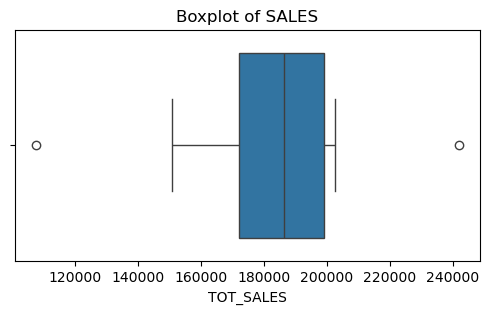

In [6]:
# Create a boxplot for the 'SALES' column
plt.figure(figsize=(6, 3))
sns.boxplot(x=data_pjy['TOT_SALES'])
plt.title('Boxplot of SALES')
plt.xlabel('TOT_SALES')
plt.show()

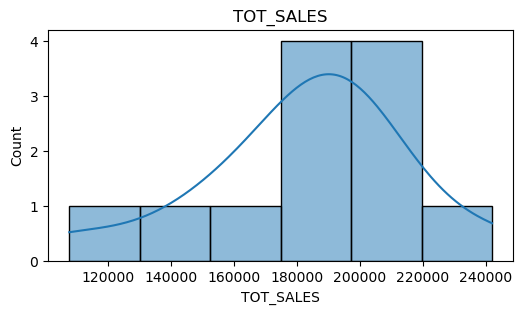

In [7]:
# Plotting the histogram for 'TOT_SALES' column
plt.figure(figsize=(6, 3))
sns.histplot(data_pjy['TOT_SALES'], kde=True)
plt.title('TOT_SALES')
plt.show()

In [8]:
if (data_pjy['TOT_SALES'] <= 0).any():
    # If there are zero or negative values, add a constant to handle it
    data_pjy['TOT_SALES'] = data_pjy['TOT_SALES'] + 1

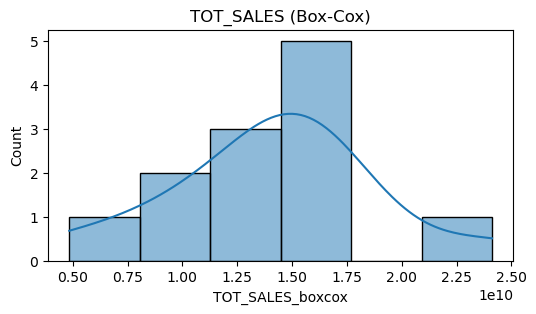

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data_pjy['TOT_SALES_boxcox'], lambda_ = stats.boxcox(data_pjy['TOT_SALES'])

# Plotting the histogram for 'TOT_SALES' column after Box-Cox transformation
plt.figure(figsize=(6, 3))
sns.histplot(data_pjy['TOT_SALES_boxcox'], kde=True)
plt.title('TOT_SALES (Box-Cox)')
plt.show()

In [10]:
data_pjy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COST_OF_GOODS        12 non-null     float64
 1   CO_SEC_FEE           12 non-null     float64
 2   SOCIAL_SECURITY_FEE  12 non-null     float64
 3   FIX_FEE              12 non-null     float64
 4   STAFF_EXPENSES       12 non-null     float64
 5   MISCELLANEOUS_FEES   12 non-null     float64
 6   SHOP_EXPENSES        12 non-null     float64
 7   WATER_BILL           12 non-null     float64
 8   ELECTRIC_BILL        12 non-null     float64
 9   TOT_SALES            12 non-null     float64
 10  TOT_SALARIES         12 non-null     float64
 11  TOT_SALES_boxcox     12 non-null     float64
dtypes: float64(12)
memory usage: 1.2 KB


In [11]:
# Display the 'TOT_SALES' and 'TOT_SALES_boxcox' columns
data_pjy[['TOT_SALES', 'TOT_SALES_boxcox']]

,TOT_SALES,TOT_SALES_boxcox
0,199573.90,1.646129e+10
1,150872.22,9.450449e+09
2,154621.08,9.921967e+09
3,107718.58,4.843915e+09
4,177926.98,1.310846e+10
5,188605.47,1.471515e+10
6,199005.04,1.636835e+10
7,202767.75,1.698799e+10
8,184558.71,1.409543e+10
9,183775.77,1.397706e+10


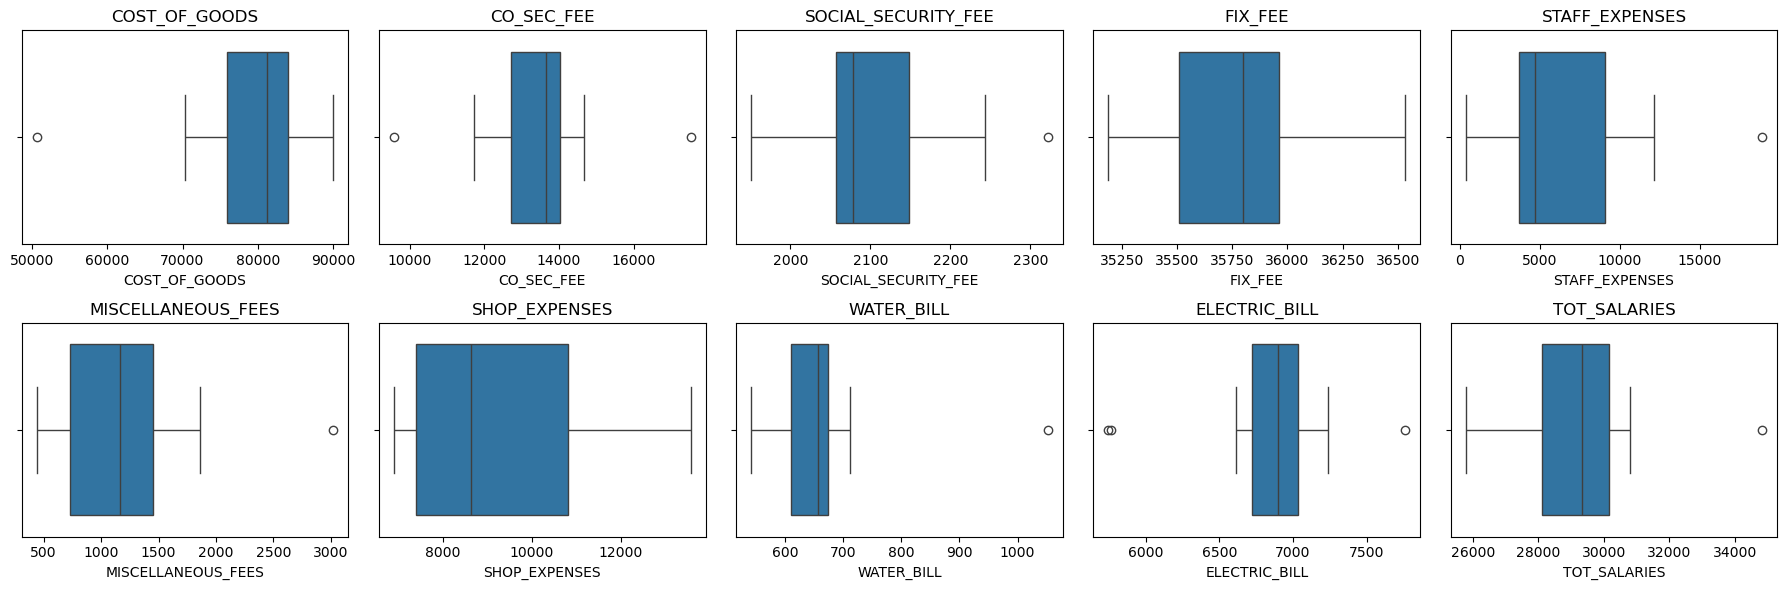

In [12]:
# Assuming data_kajang is your DataFrame, and columns is the list of column names you want to plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.boxplot(x=data_pjy[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

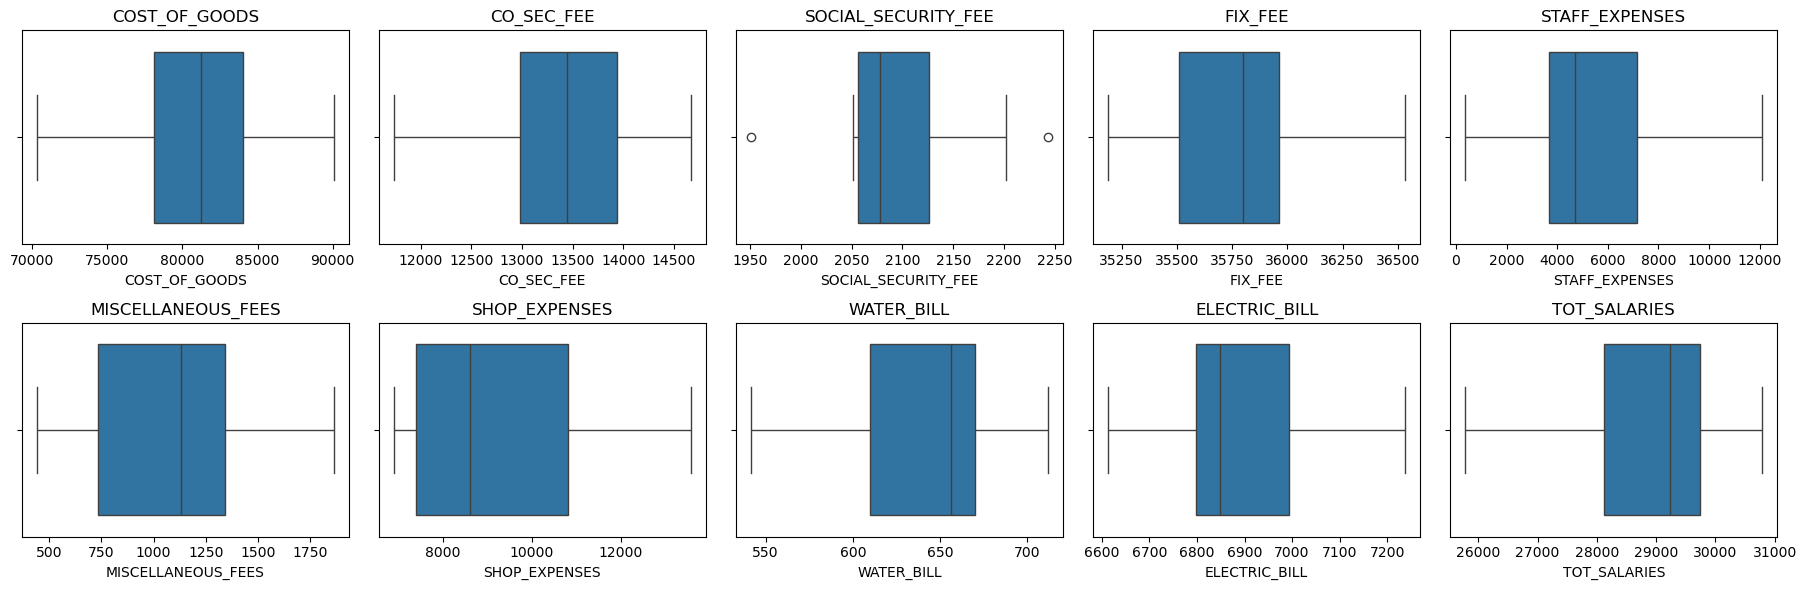

In [13]:
# Assuming data_kajang is your DataFrame and columns is the list of column names you want to process and plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Function to replace outliers with the mean
def replace_outliers_with_mean(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = data[column].mean()
        median_value = data[column].median()
        mode_value = data[column].mode()[0]
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
        #data_kajang[columns] = data_kajang[columns].mask((data_kajang[columns] < lower_bound) | (data_kajang[columns] > upper_bound)).ffill().bfill()
        #data_kajang[columns] = data_kajang[columns].mask((data_kajang[columns] < lower_bound) | (data_kajang[columns] > upper_bound)).interpolate()

# Replace outliers in each column
for column in columns:
    replace_outliers_with_mean(data_pjy, column)

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.boxplot(x=data_pjy[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

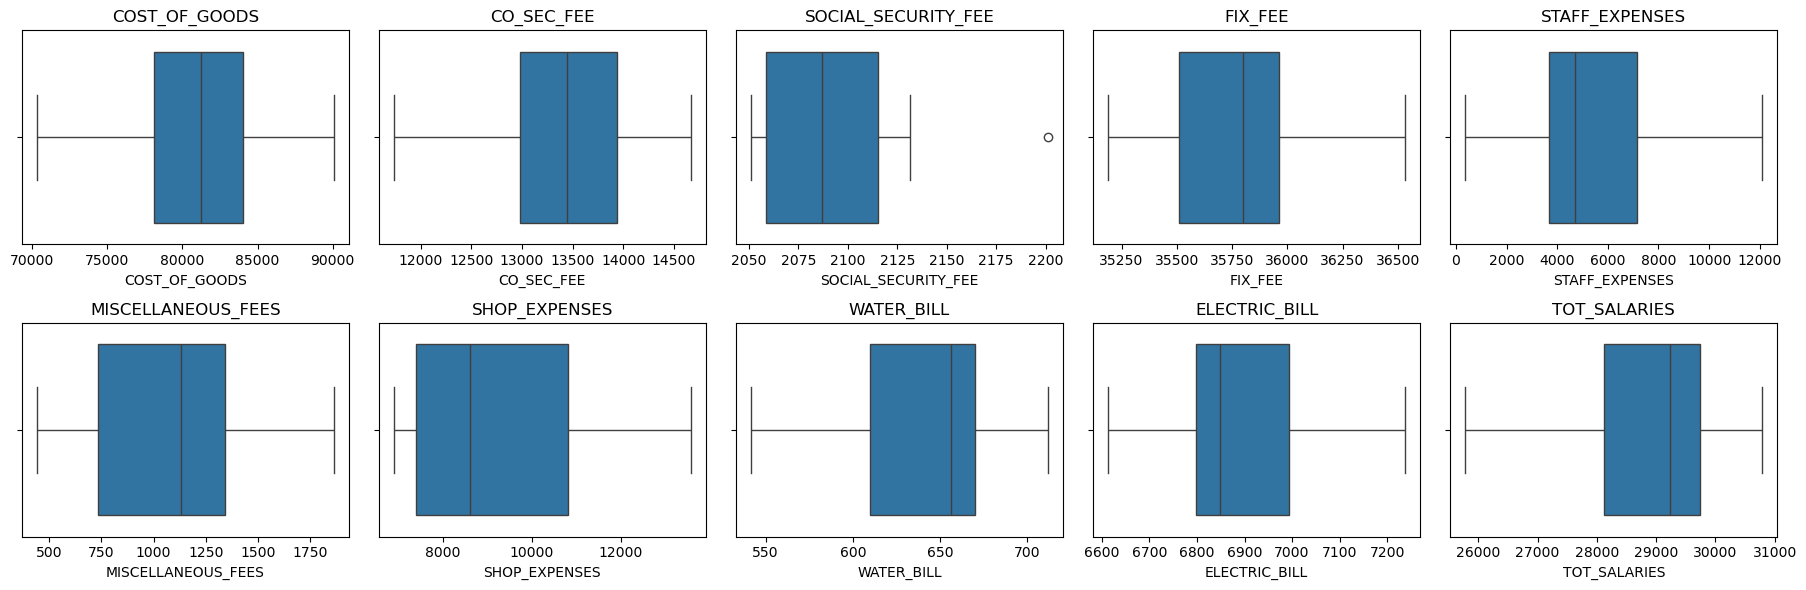

In [14]:
# Assuming data_kajang is your DataFrame and columns is the list of column names you want to process and plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Function to replace outliers with the mean
def replace_outliers_with_mean(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = data[column].mean()
        median_value = data[column].median()
        mode_value = data[column].mode()[0]
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
        #data_kajang[columns] = data_kajang[columns].mask((data_kajang[columns] < lower_bound) | (data_kajang[columns] > upper_bound)).ffill().bfill()
        #data_kajang[columns] = data_kajang[columns].mask((data_kajang[columns] < lower_bound) | (data_kajang[columns] > upper_bound)).interpolate()

# Replace outliers in each column
for column in columns:
    replace_outliers_with_mean(data_pjy, column)

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.boxplot(x=data_pjy[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

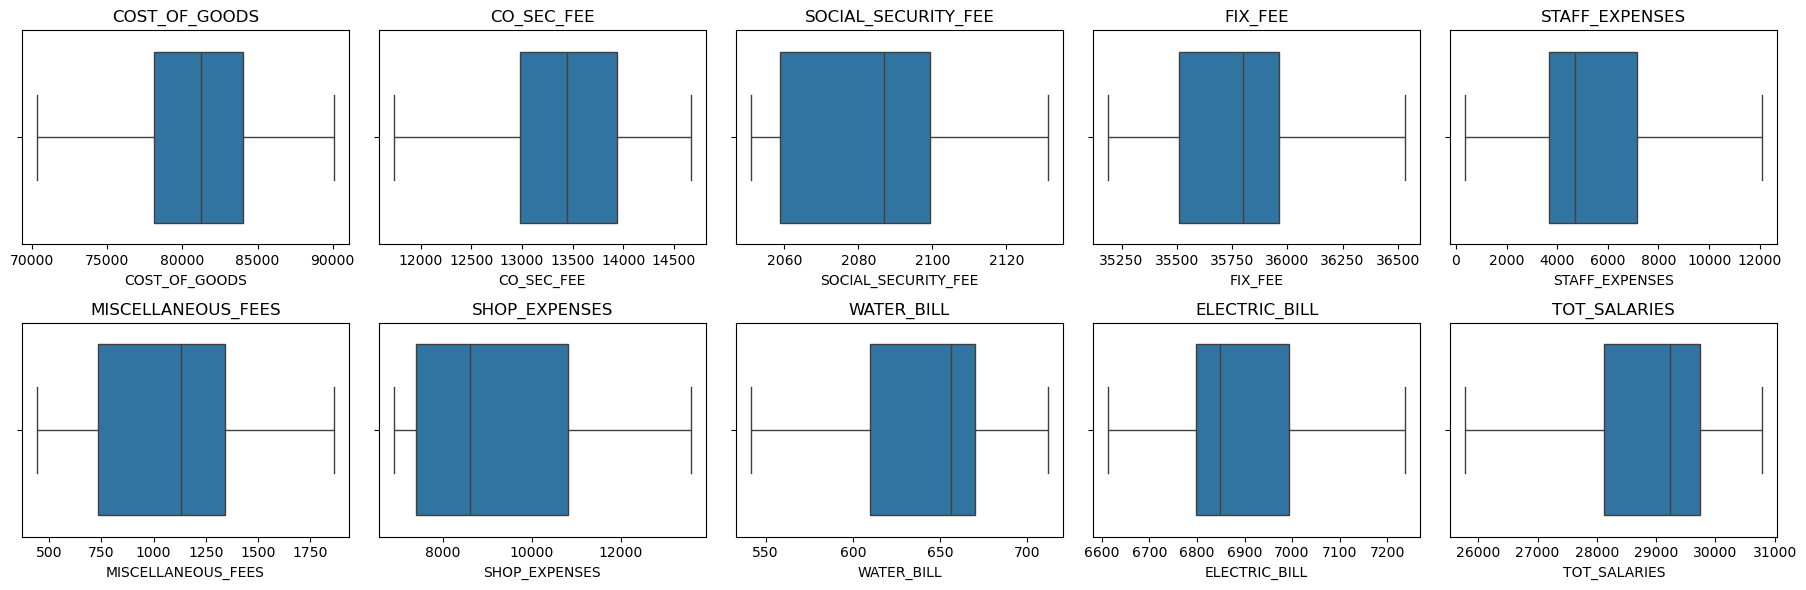

In [15]:
# Assuming data_kajang is your DataFrame and columns is the list of column names you want to process and plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Function to replace outliers with the mean
def replace_outliers_with_mean(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = data[column].mean()
        median_value = data[column].median()
        mode_value = data[column].mode()[0]
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
        #data_kajang[columns] = data_kajang[columns].mask((data_kajang[columns] < lower_bound) | (data_kajang[columns] > upper_bound)).ffill().bfill()
        #data_kajang[columns] = data_kajang[columns].mask((data_kajang[columns] < lower_bound) | (data_kajang[columns] > upper_bound)).interpolate()

# Replace outliers in each column
for column in columns:
    replace_outliers_with_mean(data_pjy, column)

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.boxplot(x=data_pjy[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

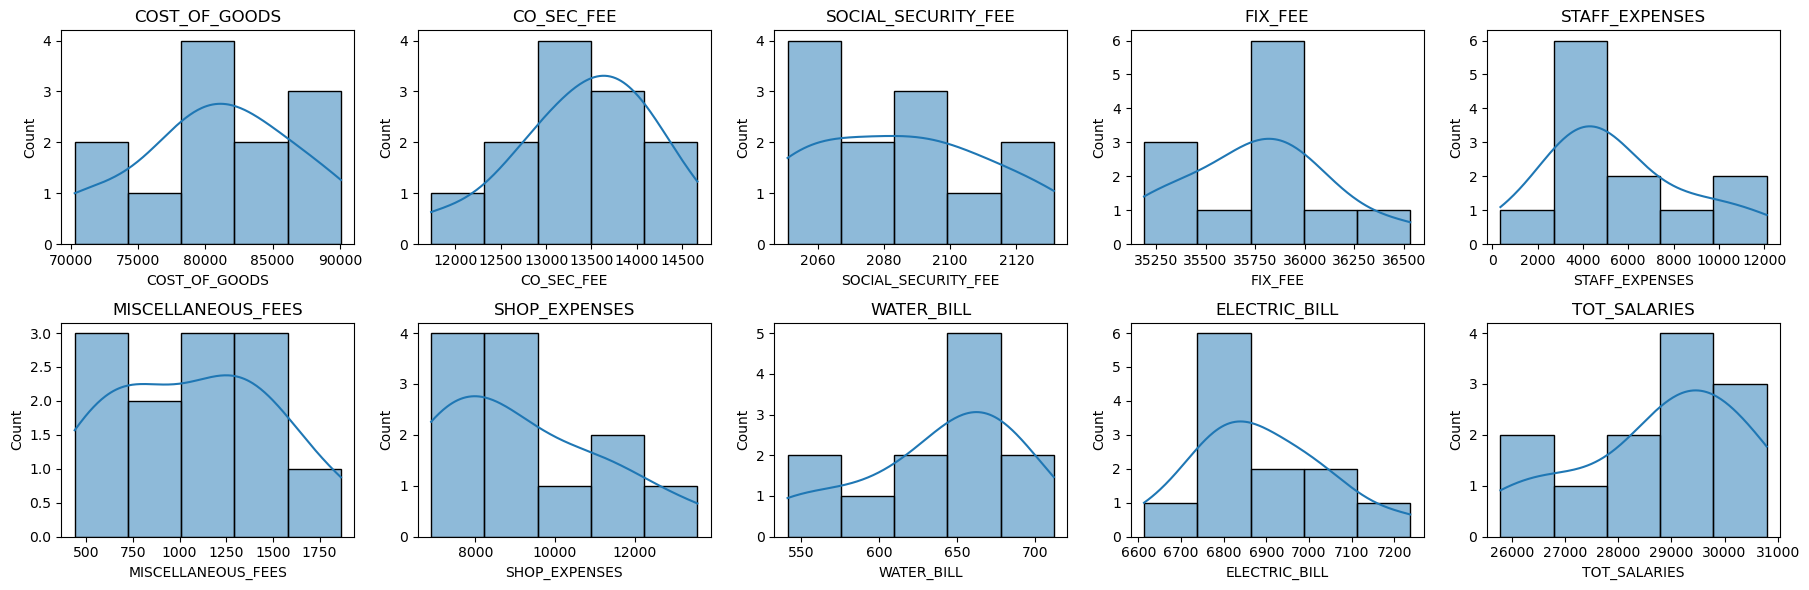

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_kajang is your DataFrame and columns is the list of column names you want to plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.histplot(data_pjy[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(column)

# # Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [17]:
data_pjy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COST_OF_GOODS        12 non-null     float64
 1   CO_SEC_FEE           12 non-null     float64
 2   SOCIAL_SECURITY_FEE  12 non-null     float64
 3   FIX_FEE              12 non-null     float64
 4   STAFF_EXPENSES       12 non-null     float64
 5   MISCELLANEOUS_FEES   12 non-null     float64
 6   SHOP_EXPENSES        12 non-null     float64
 7   WATER_BILL           12 non-null     float64
 8   ELECTRIC_BILL        12 non-null     float64
 9   TOT_SALES            12 non-null     float64
 10  TOT_SALARIES         12 non-null     float64
 11  TOT_SALES_boxcox     12 non-null     float64
dtypes: float64(12)
memory usage: 1.2 KB


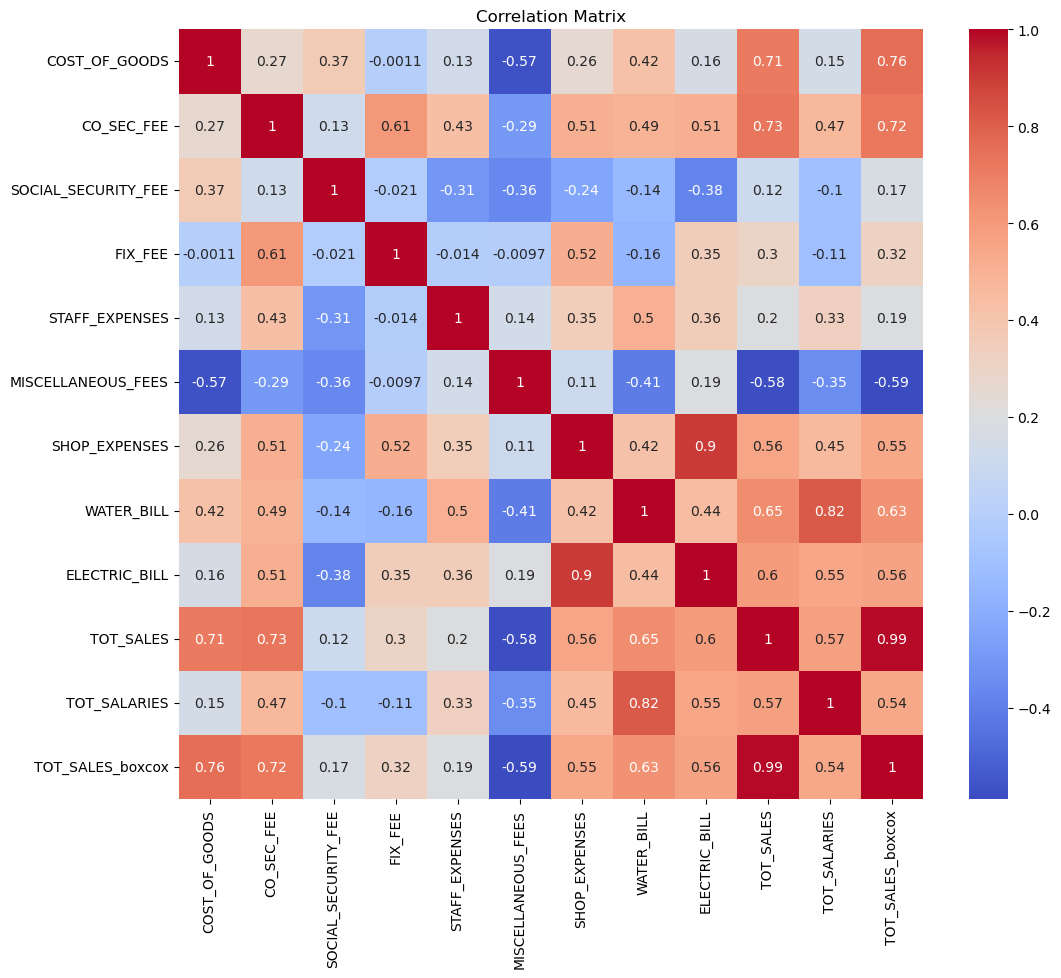

In [18]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data_pjy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
data_pjy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COST_OF_GOODS        12 non-null     float64
 1   CO_SEC_FEE           12 non-null     float64
 2   SOCIAL_SECURITY_FEE  12 non-null     float64
 3   FIX_FEE              12 non-null     float64
 4   STAFF_EXPENSES       12 non-null     float64
 5   MISCELLANEOUS_FEES   12 non-null     float64
 6   SHOP_EXPENSES        12 non-null     float64
 7   WATER_BILL           12 non-null     float64
 8   ELECTRIC_BILL        12 non-null     float64
 9   TOT_SALES            12 non-null     float64
 10  TOT_SALARIES         12 non-null     float64
 11  TOT_SALES_boxcox     12 non-null     float64
dtypes: float64(12)
memory usage: 1.2 KB


# Simple Linear Regression

In [20]:
#define x and y
x_simple=data_pjy['COST_OF_GOODS'].values
y_simple=data_pjy['TOT_SALES'].values

In [21]:
print(x_simple)

[88472.51 70295.4  70856.58 78399.15 82579.61 81653.66 83224.48 86368.2
 77595.82 78285.94 80788.21 90077.11]


In [22]:
print(y_simple)

[199573.9  150872.22 154621.08 107718.58 177926.98 188605.47 199005.04
 202767.75 184558.71 183775.77 198573.97 241921.5 ]


In [31]:
#split dataset into training and testing 
x_simple_train, x_simple_test, y_simple_train, y_simple_test = train_test_split(x_simple, y_simple, test_size = 0.5, random_state = 42)

# train model
sl = LinearRegression()
sl.fit(x_simple_train.reshape(-1, 1), y_simple_train)

# Predict result
y_simple_pred = sl.predict(x_simple_test.reshape(-1, 1))
print(y_simple_pred)


[174666.60268446 161696.64649945 214496.45090726 158119.56402538
 179152.46895002 123188.22267523]


In [33]:
# Evaluate the model
r2_simple = r2_score(y_simple_test, y_simple_pred)
mse_simple = mean_squared_error(y_simple_test, y_simple_pred)
mae_simple = mean_absolute_error(y_simple_test, y_simple_pred)

print(f'R²: {r2_simple}')
print(f'MSE: {mse_simple}')
print(f'MAE: {mae_simple}')

R²: -1.2921035220276287
MSE: 509690770.06829184
MAE: 21372.341012118955


In [34]:
# Create a DataFrame with Actual and Predicted values
pred_y_data_pjy_simple = pd.DataFrame({'Actual Value': y_simple_test, 'Predicted Value': y_simple_pred})
pred_y_data_pjy_simple

,Actual Value,Predicted Value
0,198573.97,174666.602684
1,183775.77,161696.646499
2,199573.90,214496.450907
3,184558.71,158119.564025
4,188605.47,179152.468950
5,154621.08,123188.222675


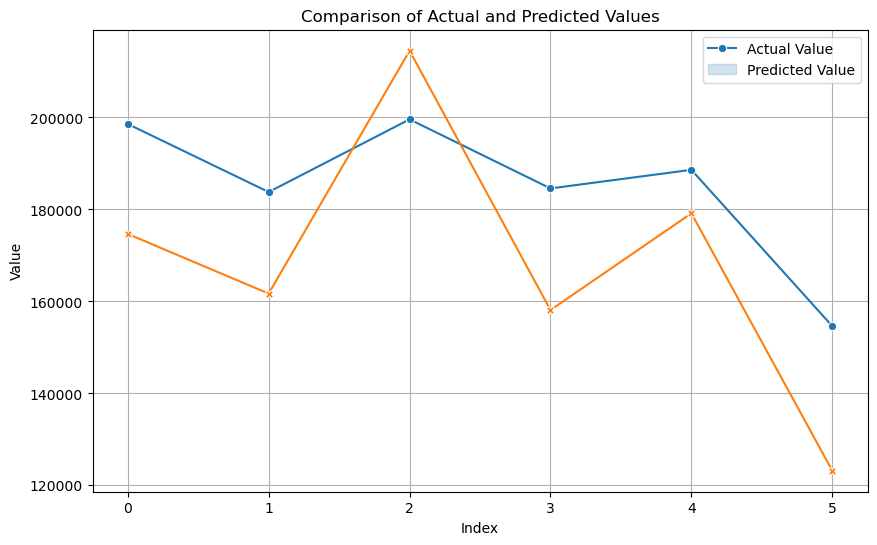

In [35]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=pred_y_data_pjy_simple, markers=True, dashes=False)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(['Actual Value', 'Predicted Value'])
plt.grid(True)

plt.show()

In [36]:
# Randomly select 3 samples from x_test_simple
random_indices_simple = np.random.choice(len(x_simple_test), size=3, replace=False)
random_x_simple_test = x_simple_test[random_indices_simple]

# Repeat the selected samples 4 times to simulate data for the next 4 months
x_future_simple = np.tile(random_x_simple_test, (4, 1))

# Predict the sales for the next 4 months
y_simple_pred = sl.predict(x_future_simple.reshape(-1, 1))
y_simple_pred

array([214496.45090726, 174666.60268446, 161696.64649945, 214496.45090726,
       174666.60268446, 161696.64649945, 214496.45090726, 174666.60268446,
       161696.64649945, 214496.45090726, 174666.60268446, 161696.64649945])

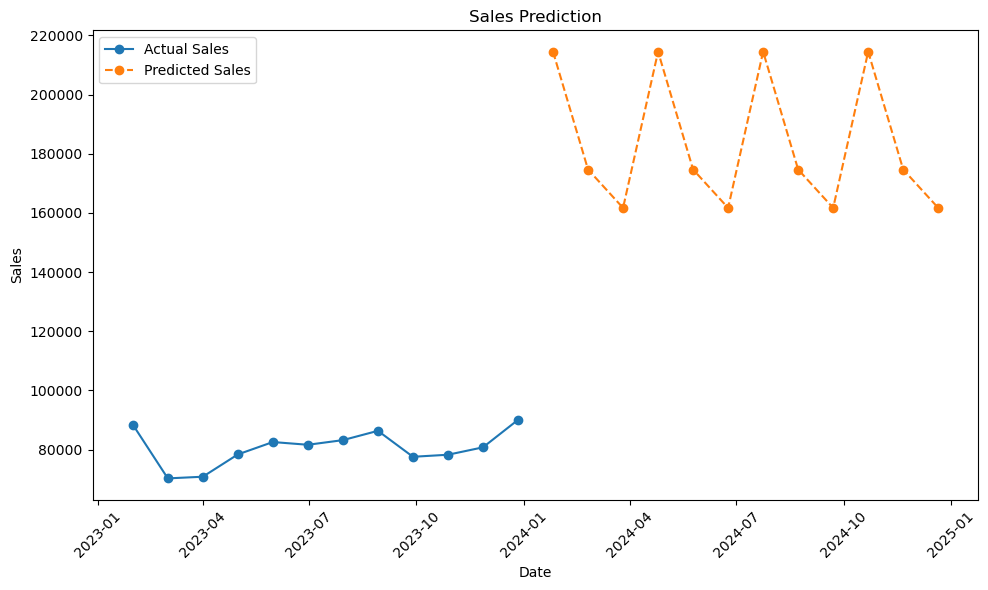

In [38]:
# Get the actual sales data
sales_simple = data_pjy['COST_OF_GOODS'].values

# Create dates for the actual data (assuming the last day of each month)
start_date_simple = datetime(2023, 1, 31)
dates_simple = [start_date_simple + timedelta(days=30 * i) for i in range(len(sales_simple))]

# Create dates for the next 12 months
future_dates_simple = [dates_simple[-1] + timedelta(days=30 * i) for i in range(1, 13)]

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(dates_simple, sales_simple, marker='o', label='Actual Sales')
plt.plot(future_dates_simple, y_simple_pred, marker='o', linestyle='dashed', label='Predicted Sales')

# Add labels and title
plt.title('Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # 旋转x轴标签以便于阅读

# Show the plot
plt.tight_layout()
plt.show()

# Multiple Linear Regression

In [39]:
#define x and y
x=data_pjy.drop(['TOT_SALES_boxcox'], axis=1).values
y=data_pjy['TOT_SALES_boxcox'].values

In [40]:
print(x)

[[ 88472.51        13439.65083333   2131.3         35428.74
    4504.8           538.17         7486.12          651.39
    6761.14       199573.9         29259.075     ]
 [ 70295.4         13439.65083333   2077.1         35188.89
    8780.11         1422.72         7027.11          670.3375
    6842.56       150872.22        30792.27      ]
 [ 70856.58        14087.62         2094.98229167  36533.3
    3815.44         1317.62         8371.88          541.55
    6798.18416667 154621.08        26530.95      ]
 [ 78399.15        11732.86         2094.63350694  35535.4
    3724.37         1552.98         6888.01          555.14
    6613.22       107718.58        25779.15      ]
 [ 82579.61        12667.26         2094.98229167  35229.58
    3362.1          1043.3          7129.09          613.56
    6798.18416667 177926.98        27038.02      ]
 [ 81653.66        13439.3          2112.4375      35821.65
    3518.82          737.7          9307.07          669.69
    6798.18416667 188605.

In [41]:
print(y)

[1.64612938e+10 9.45044875e+09 9.92196718e+09 4.84391516e+09
 1.31084585e+10 1.47151469e+10 1.63683463e+10 1.69879909e+10
 1.40954335e+10 1.39770622e+10 1.62980865e+10 2.41126671e+10]


In [42]:
#split dataset into training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

In [43]:
# train model
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [44]:
# Predict result
y_pred = ml.predict(x_test)
print(y_pred)

[1.64790138e+10 1.40295314e+10 1.89833019e+10 1.53225763e+10
 1.64911561e+10 7.81203833e+09]


In [45]:
# Evaluete the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R²: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R²: 0.44872430739762625
MSE: 2.5846500393123656e+18
MAE: 1311414225.088545


In [46]:
# Create a DataFrame with Actual and Predicted values
pred_y_data_pjy = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
pred_y_data_pjy

,Actual Value,Predicted Value
0,1.629809e+10,1.647901e+10
1,1.397706e+10,1.402953e+10
2,1.646129e+10,1.898330e+10
3,1.409543e+10,1.532258e+10
4,1.471515e+10,1.649116e+10
5,9.921967e+09,7.812038e+09


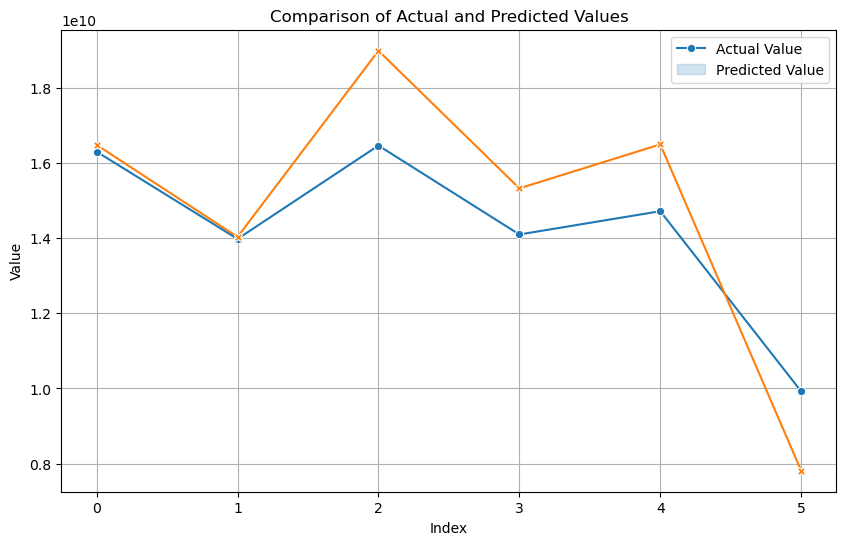

In [47]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=pred_y_data_pjy, markers=True, dashes=False)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(['Actual Value', 'Predicted Value'])
plt.grid(True)

plt.show()

In [48]:
# Randomly select 3 samples from x_test
random_indices = np.random.choice(len(x_test), size=6, replace=False)
random_x_test = x_test[random_indices]

# Repeat the selected samples 5 times to simulate data for the next 12 months
x_future = np.tile(random_x_test, (2, 1))

# Predict the sales for the next 12 months
y_pred_boxcox = ml.predict(x_future)
y_pred_boxcox

array([1.64790138e+10, 1.40295314e+10, 1.53225763e+10, 7.81203833e+09,
       1.64911561e+10, 1.89833019e+10, 1.64790138e+10, 1.40295314e+10,
       1.53225763e+10, 7.81203833e+09, 1.64911561e+10, 1.89833019e+10])

In [49]:
# Reverse the Box-Cox transformation
def inv_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y) - 1
    else:
        return (np.exp(np.log(lambda_ * y + 1) / lambda_)) - 1

y_pred = inv_boxcox(y_pred_boxcox, lambda_)
y_pred

array([199681.16962975, 184122.21943232, 192489.78530943, 137063.83222138,
       199755.3256128 , 214441.86520654, 199681.16962975, 184122.21943232,
       192489.78530943, 137063.83222138, 199755.3256128 , 214441.86520654])

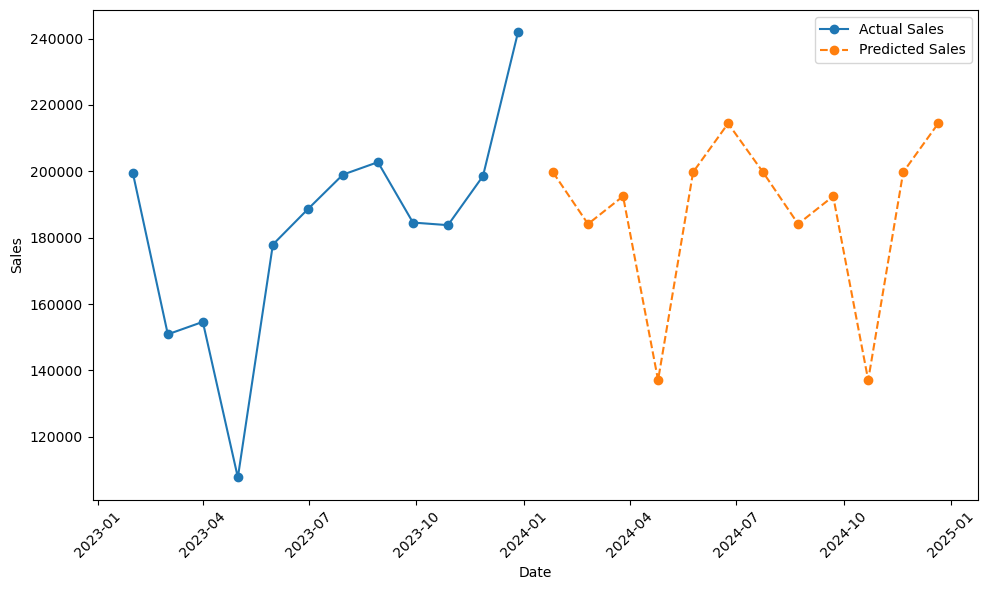

In [53]:
# Get the actual sales data
sales = data_pjy['TOT_SALES'].values

# Create dates for the actual data (assuming the last day of each month)
start_date = datetime(2023, 1, 31)
dates = [start_date + timedelta(days=30 * i) for i in range(len(sales))]

# Create dates for the next 12 months
future_dates = [dates[-1] + timedelta(days=30 * i) for i in range(1, 13)]

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(dates, sales, marker='o', label='Actual Sales')
plt.plot(future_dates, y_pred, marker='o', linestyle='dashed', label='Predicted Sales')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()